### <span style="color:lightblue">Loading Libraries and Data</span>


In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

#### <span style="color:lightblue">Understanding the Data</span>


In [4]:
df = pd.read_csv("Telecom.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4151,7733-UDMTP,Female,1,No,No,57,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,55.00,3094.05,No
5516,6923-EFPNL,Male,0,No,No,4,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),51.75,201.1,Yes
1517,2924-KHUVI,Male,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,100.55,5514.95,No
2672,2150-OEGBV,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.10,562.6,No
4056,3329-WDIOK,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.60,155.35,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### <span style="color:lightblue">Visualizing the Missing Values the Data</span>


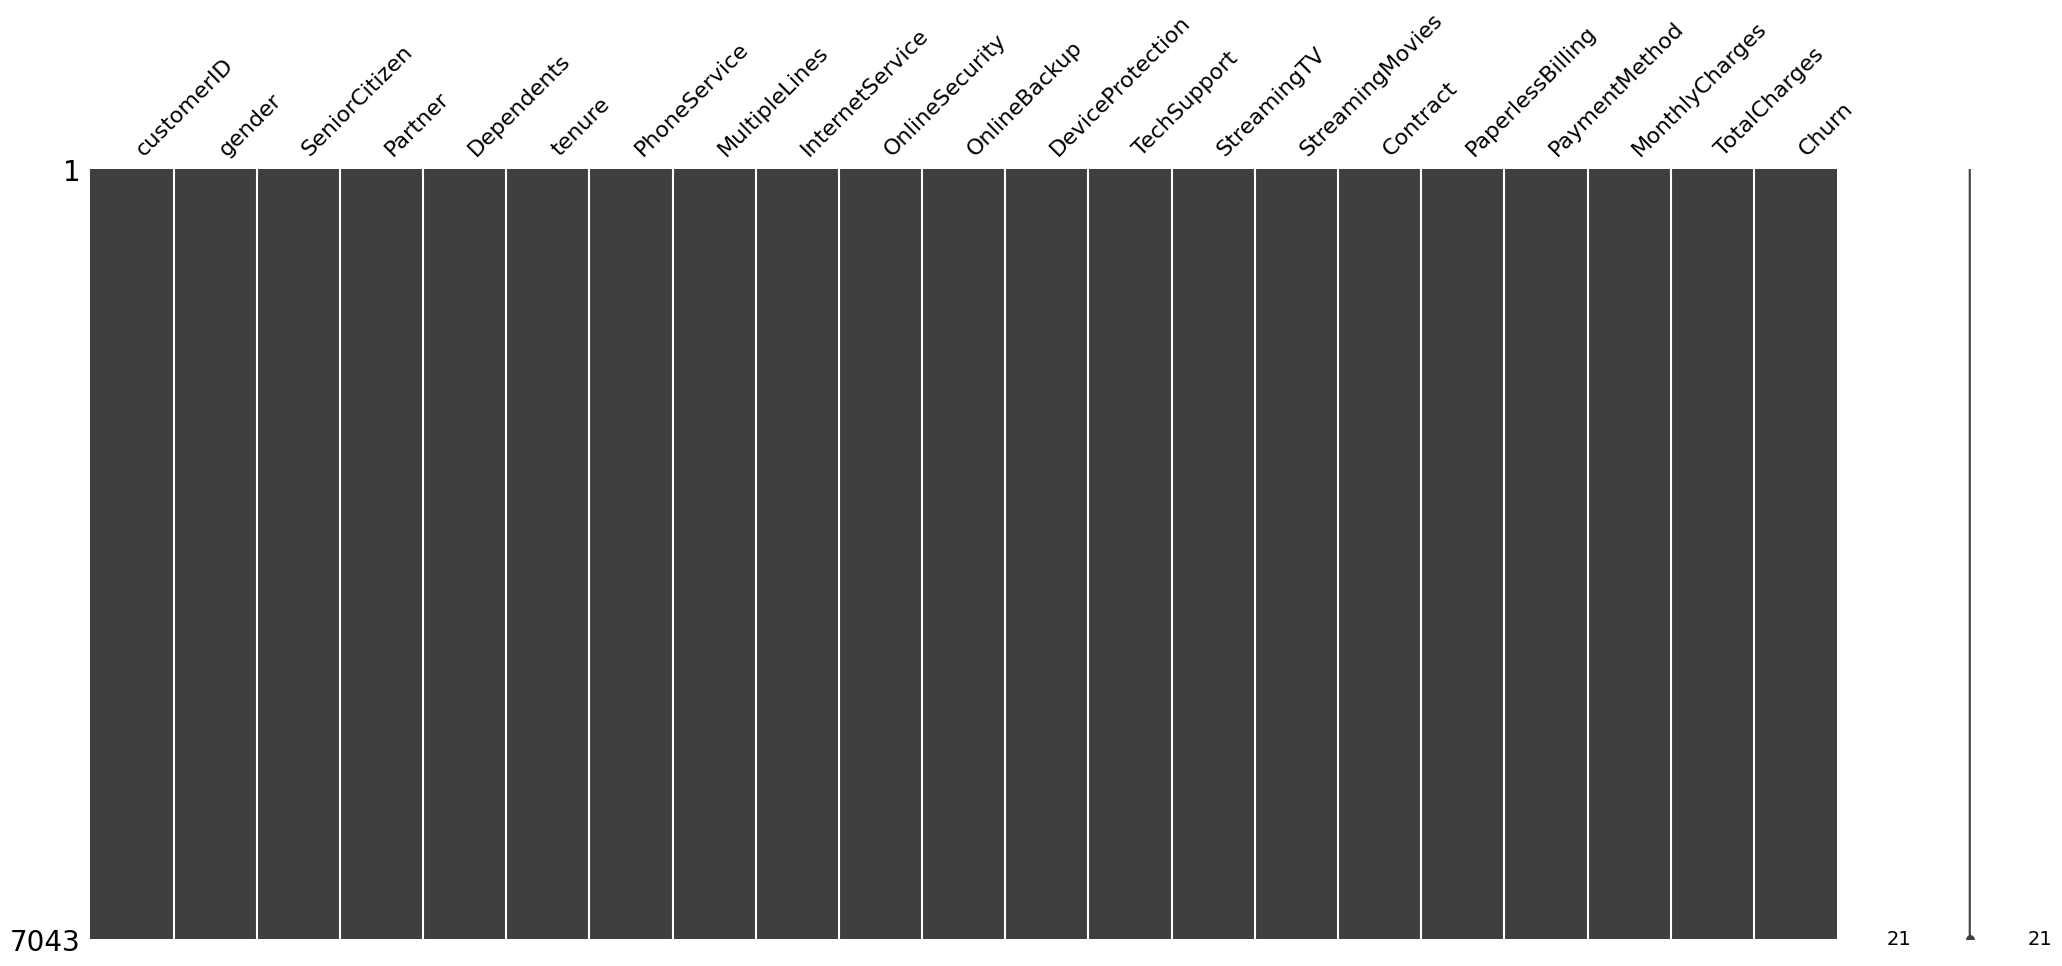

In [9]:
# Visualize missing values as a matrix
msno.matrix(df);

#### <span style="color:lightblue">Drop customerID column as it is of no use</span>


In [10]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### <span style="color:lightblue">Converting 'TotalCharges' to numeric and find out missing values</span>


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### <span style="color:lightblue">TotalCharges Column</span>


In [12]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

#### <span style="color:lightblue">Drop Rows with null values</span>


In [14]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [18]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


#### <span style="color:lightblue">Data Visualization</span>


#### <span style="color:lightblue">Gender and Churn Distributions</span>


In [19]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [20]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define labels for gender and churn categories
gender_labels = ['Male', 'Female']
churn_labels = ['No', 'Yes']

# Create subplots with two pie charts side by side
fig = make_subplots(
    rows=1, 
    cols=2, 
    specs=[[{'type': 'domain'}, {'type': 'domain'}]]
)

# Add the first pie chart for gender distribution
fig.add_trace(
    go.Pie(
        labels=gender_labels, 
        values=df['gender'].value_counts(), 
        name="Gender"
    ),
    row=1, 
    col=1
)

# Add the second pie chart for churn distribution
fig.add_trace(
    go.Pie(
        labels=churn_labels, 
        values=df['Churn'].value_counts(), 
        name="Churn"
    ),
    row=1, 
    col=2
)

# Customize the pie charts to look like donuts
fig.update_traces(
    hole=0.4,  # Creates the donut hole
    hoverinfo="label+percent+name",  # Displays label, percent, and name on hover
    textfont_size=16  # Sets the font size for the labels
)

# Add a title and annotations to the plot
fig.update_layout(
    title_text="Gender and Churn Distributions",  # Main title
    annotations=[
        dict(
            text='Gender', 
            x=0.16,  # Position of the annotation for the gender chart
            y=0.5, 
            font_size=20, 
            showarrow=False  # No arrow for the annotation
        ),
        dict(
            text='Churn', 
            x=0.84,  # Position of the annotation for the churn chart
            y=0.5, 
            font_size=20, 
            showarrow=False  # No arrow for the annotation
        )
    ]
)

# Display the plot
fig.show()

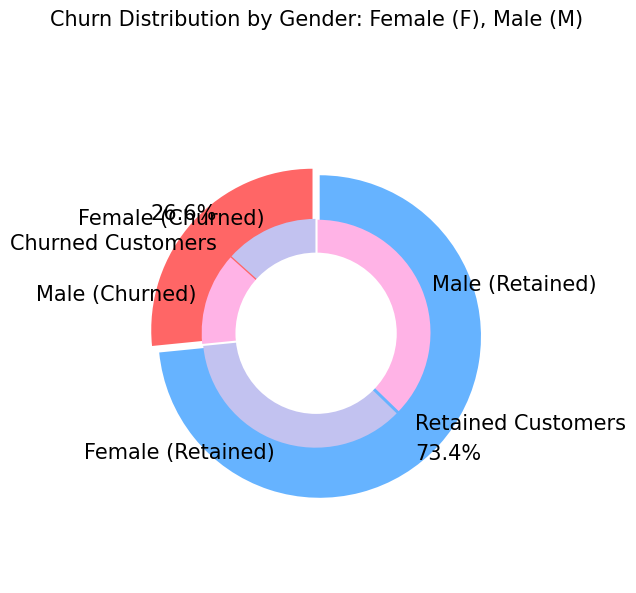

In [22]:
import matplotlib.pyplot as plt

# Data for churn distribution
churn_labels = ["Churned Customers", "Retained Customers"]
churn_values = [1869, 5163]  # Number of customers who churned and stayed

# Data for gender distribution within churn categories
gender_labels = ["Female (Churned)", "Male (Churned)", "Female (Retained)", "Male (Retained)"]
gender_sizes = [939, 930, 2544, 2619]  # Gender breakdown for churned and retained customers

# Color schemes for the pie charts
churn_colors = ['#ff6666', '#66b3ff']  # Colors for churn categories
gender_colors = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']  # Colors for gender breakdown

# Explode settings for emphasis
churn_explode = (0.3, 0.3)  # Slightly separate churn categories
gender_explode = (0.1, 0.1, 0.1, 0.1)  # Slightly separate gender segments

# Text properties for better readability
text_settings = {"fontsize": 15}

# Create the figure
plt.figure(figsize=(6, 6))

# First pie chart: Churn distribution
plt.pie(
    churn_values,
    labels=churn_labels,
    autopct='%1.1f%%',
    pctdistance=1.08,
    labeldistance=0.8,
    colors=churn_colors,
    startangle=90,
    explode=churn_explode,
    radius=10,
    textprops=text_settings,
    counterclock=True,
)

# Second pie chart: Gender distribution within churn categories
plt.pie(
    gender_sizes,
    labels=gender_labels,
    colors=gender_colors,
    startangle=90,
    explode=gender_explode,
    radius=7,
    textprops=text_settings,
    counterclock=True,
)

# Draw a white circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
current_figure = plt.gcf()
current_figure.gca().add_artist(center_circle)

# Add a title to the plot
plt.title('Churn Distribution by Gender: Female (F), Male (M)', fontsize=15, y=1.1)

# Ensure the plot is circular and well-formatted
plt.axis('equal')
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [24]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [25]:

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

#### <span style="color:lightblue">Correlation Analysis</span>


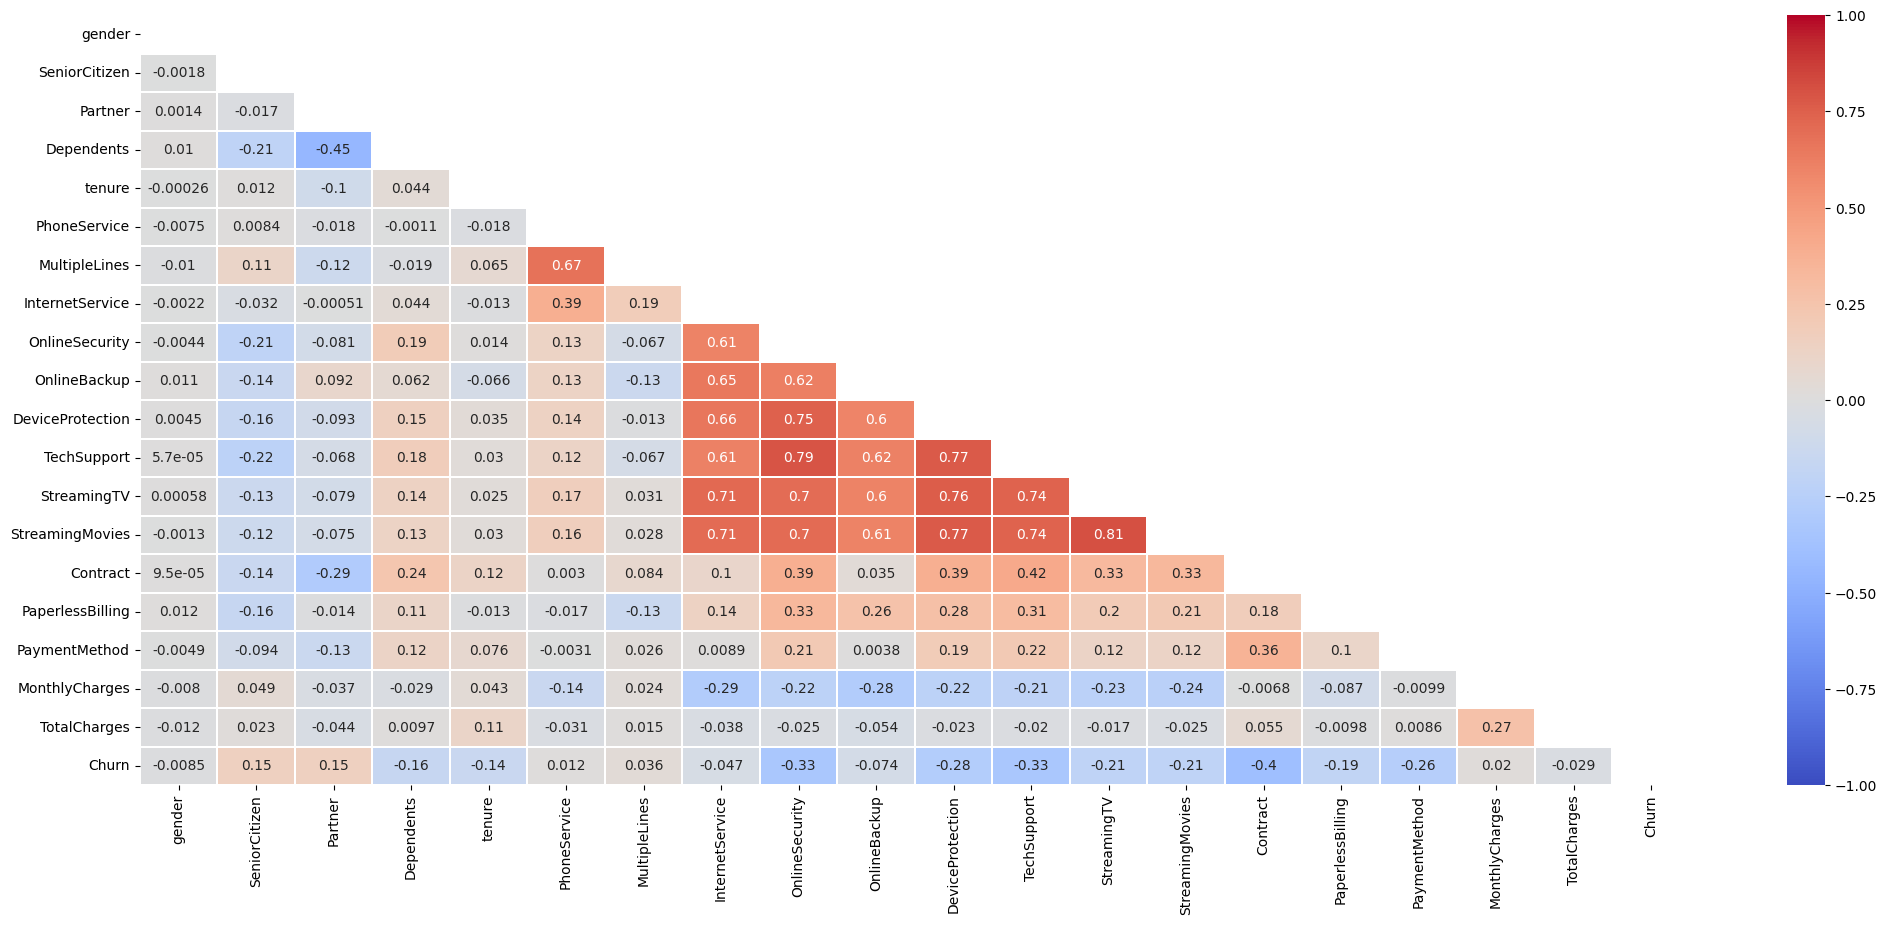

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#### <span style="color:lightblue">Splitting Data into train and test sets</span>


In [27]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [28]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [30]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

#### <span style="color:lightblue">Standardize numeric attributes</span>


In [32]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)


In [33]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### <span style="color:lightblue">KNN Model</span>


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [35]:

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



#### <span style="color:lightblue">Random Forest Model</span>


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

NameError: name 'metrics' is not defined

In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

